# Fetch Data from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Necessary Libraries

In [3]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

# Load the CSVs

In [ ]:

# Path to the folder
notebook_dir = os.path.dirname(os.path.abspath("__file__"))

# Build path to DataSet at the top level
dataset_dir = os.path.join(notebook_dir, "..", "DataSet")
dataset_dir = os.path.abspath(dataset_dir)

# Find all CSVs
filelist = glob.glob(os.path.join(dataset_dir, "*", "*.csv"))

In [5]:
print(len(filelist))
print(filelist[0])

848
/content/drive/MyDrive/DataSet2/User21/253_Werable1_2020-10-31T14.45.39.238_F1E55E2FE95F_Pressure_7.330Hz_1.5.0.csv


In [6]:
# Dictionary so I can associate activity number w/ the activity
expDic = {1: "Sitting and Reading a Book", 2: "Sitting and Writing in a Notebook", 3: "Typing Using Computer", 4: "Browsing Using Computer", 5: "Moving Head, Body While Sitting",
          6: "Moving Chair While Sitting", 7: "Stand up From Sitting", 8: "Standing", 9: "Walking", 10: "Running", 11: "Taking Stairs",
          12: "Moving Around While Sitting", 13: "Moving Around While Standing", 14: "Picking Up Items While Sitting", 15: "Picking Up Items While Standing"}


In [7]:
df = pd.DataFrame(filelist, columns=["file_path"])
df.head()

,file_path
0,/content/drive/MyDrive/DataSet2/User21/253_Wer...
1,/content/drive/MyDrive/DataSet2/User21/253_Wer...
2,/content/drive/MyDrive/DataSet2/User21/253_Wer...
3,/content/drive/MyDrive/DataSet2/User21/253_Wer...
4,/content/drive/MyDrive/DataSet2/User21/254_Wer...


# Dataframe Containing All of the Data

In [8]:
# Empty list to hold DataFrames
dataframes = []

# Iterate over each file path in the DataFrame and read them in as dataframes
for file_path in df['file_path']:
    data = pd.read_csv(file_path)
    dataframes.append(data)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)
# Display the combined DataFrame
combined_df.head(10)

,epoch (ms),time (-13:00),elapsed (s),pressure (Pa),x-axis (T),y-axis (T),z-axis (T),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),x-axis (g),y-axis (g),z-axis (g)
0,1604169939377,2020-10-31T14:45:39.377,0.000,99226.570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1604169939513,2020-10-31T14:45:39.513,0.136,99220.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1604169939648,2020-10-31T14:45:39.648,0.271,99225.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1604169939784,2020-10-31T14:45:39.784,0.407,99218.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1604169939919,2020-10-31T14:45:39.919,0.542,99222.656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1604169940055,2020-10-31T14:45:40.055,0.678,99223.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1604169940191,2020-10-31T14:45:40.191,0.814,99220.883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1604169940326,2020-10-31T14:45:40.326,0.949,99219.141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1604169940462,2020-10-31T14:45:40.462,1.085,99224.641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1604169940598,2020-10-31T14:45:40.598,1.221,99225.945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# Potentially Helpful Methods

In [9]:
# Written in class
def exp_No(expID):
  if expID % 15 == 0:
    return 15
  return expID

def exp_Name(expID):
    expID = exp_No(expID)
    return expDic.get(expID, "Unknown Experiment")

# Create a DataFrame for Mapping Content (Uses Custom CSV)

In [ ]:
# Load the data_collection.csv file that contains the numbers used for mapping together activity/exp, etc. I created it using the data collection sheet.
mapping_df = pd.read_csv(os.path.join(dataset_dir, "data_collection.csv"))
mapping_df.head(10)

,S. No,Subject,Activity,Details,Activity No.,Exp. No
0,1,User 13,Sitting,Reading a book,1,133.0
1,1,User 13,Sitting,Writing in a notebook,2,134.0
2,1,User 13,Using computer,Typing,3,135.0
3,1,User 13,Using computer,Browsing,4,136.0
4,1,User 13,While sitting,"Moving head, body",5,137.0
5,1,User 13,While sitting,Moving chair,6,138.0
6,1,User 13,Sitting,Stand up from sitting,7,139.0
7,1,User 13,Standing,Standing,8,140.0
8,1,User 13,NaN,Walking,9,141.0
9,1,User 13,NaN,Running,10,142.0


# Create a Dictionary of Dataframes Based on Activity Type and Sensor

In [68]:
# Generate mappings from Exp. No to Activity No and User
exp_to_activity = dict(zip(mapping_df["Exp. No"], mapping_df["Activity No."]))
exp_to_user = dict(zip(mapping_df["Exp. No"], mapping_df["Subject"]))

# Dictionary to hold dataframes grouped by Activity No.
activity_dataframes = {}

# Iterate over each file, read it, and append it to the correct Activity No. group
for filepath in filelist:
    # Extract the Exp. No. part from the filename using a regular expression
    file_name_part = filepath.split('/')[-1].split('_')[0]
    match = re.match(r"(\d+)", file_name_part)

    if match:
        exp_no = int(match.group(0))  # Convert the matched numeric string to an integer
    else:
        continue  # Skip file if it doesn't contain a valid numeric Exp. No.

    # Find the associated Activity No. and User
    activity_no = exp_to_activity.get(exp_no)
    user = exp_to_user.get(exp_no)

    # Read the data file
    df = pd.read_csv(filepath)

    # Get the Activity Name from the expDic dictionary
    activity_name = expDic.get(activity_no, f"Activity {activity_no}")

    # Extract sensor type from the filename
    sensor_type = filepath.split('/')[-1].split('_')[4]

    # Create a key combining activity name and sensor type
    combined_key = f"{activity_name}_{sensor_type}"

    # Add the user and activity columns to the DataFrame
    df["User"] = user
    df["Activity"] = activity_name

    # Append the DataFrame to the activity group using the descriptive name
    if combined_key in activity_dataframes:
        activity_dataframes[combined_key] = pd.concat([activity_dataframes[combined_key], df], ignore_index=True)
    else:
        activity_dataframes[combined_key] = df

# Create a Dictionary of Dataframes Based on Specific Exp No. and Sensor Type

In [12]:
# Generate a dictionary to map Exp. No to Activity No.
exp_to_activity = dict(zip(mapping_df["Exp. No"], mapping_df["Activity No."]))

# Dictionary to hold dataframes grouped by Exp. No and Sensor Type
exp_sensor_dataframes = {}

# Iterate over each file, read it, and append it to the correct Exp. No and Sensor Type group
for filepath in filelist:
    # Extract the Exp. No. from the filename
    file_name_part = filepath.split('/')[-1].split('_')[0]

    # Use regex to find the numeric portion at the start of the filename
    match = re.match(r"(\d+)", file_name_part)

    if match:
        # Converting that number to an integer for matching
        exp_no = int(match.group(0))
    else:
        # Skip file if it doesn't contain a valid numeric Exp. No.
        continue

    # Read the data file
    df = pd.read_csv(filepath)

    # Extract sensor type from the filename
    sensor_type = filepath.split('/')[-1].split('_')[4]

    # Create a key combining Exp. No and sensor type
    combined_key = f"{exp_no}_{sensor_type}"

    # Append the dataframe to the experiment group using the description key
    if combined_key in exp_sensor_dataframes:
        exp_sensor_dataframes[combined_key] = pd.concat([exp_sensor_dataframes[combined_key], df], ignore_index=True)
    else:
        exp_sensor_dataframes[combined_key] = df

# Create a Dataframe for Exploratory Data Analysis

In [13]:
# List to collect each activity DataFrame with an activity type column added
combined_data = []

for activity, data in activity_dataframes.items():
    # Extract activity type from the dictionary key
    activity_type = activity.split('_')[0]

    # Add a new column for the activity type
    data['activity'] = activity_type

    # Append to the list
    combined_data.append(data)

# Concatenate all the data into a single DataFrame
all_activities_df = pd.concat(combined_data, ignore_index=True)

# Preview of the df
all_activities_df.head(10)

,epoch (ms),time (-13:00),elapsed (s),pressure (Pa),User,activity,x-axis (T),y-axis (T),z-axis (T),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),x-axis (g),y-axis (g),z-axis (g)
0,1604169939377,2020-10-31T14:45:39.377,0.000,99226.570,User 21,Sitting and Reading a Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1604169939513,2020-10-31T14:45:39.513,0.136,99220.047,User 21,Sitting and Reading a Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1604169939648,2020-10-31T14:45:39.648,0.271,99225.266,User 21,Sitting and Reading a Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1604169939784,2020-10-31T14:45:39.784,0.407,99218.273,User 21,Sitting and Reading a Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1604169939919,2020-10-31T14:45:39.919,0.542,99222.656,User 21,Sitting and Reading a Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1604169940055,2020-10-31T14:45:40.055,0.678,99223.047,User 21,Sitting and Reading a Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1604169940191,2020-10-31T14:45:40.191,0.814,99220.883,User 21,Sitting and Reading a Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1604169940326,2020-10-31T14:45:40.326,0.949,99219.141,User 21,Sitting and Reading a Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1604169940462,2020-10-31T14:45:40.462,1.085,99224.641,User 21,Sitting and Reading a Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1604169940598,2020-10-31T14:45:40.598,1.221,99225.945,User 21,Sitting and Reading a Book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis Graphs

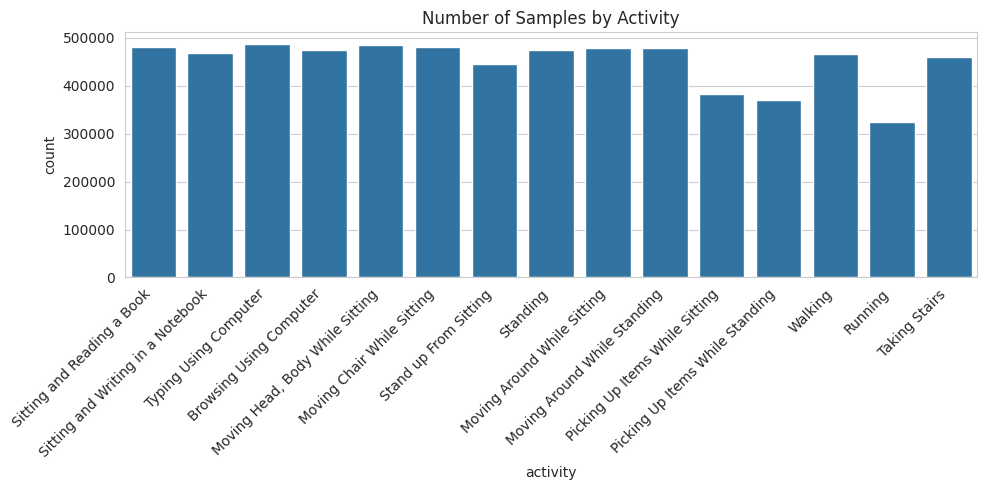

In [14]:
sns.set_style("whitegrid")

# Count plot by activity type
plt.figure(figsize=(10, 5))
sns.countplot(x='activity', data=all_activities_df)
plt.title('Number of Samples by Activity')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

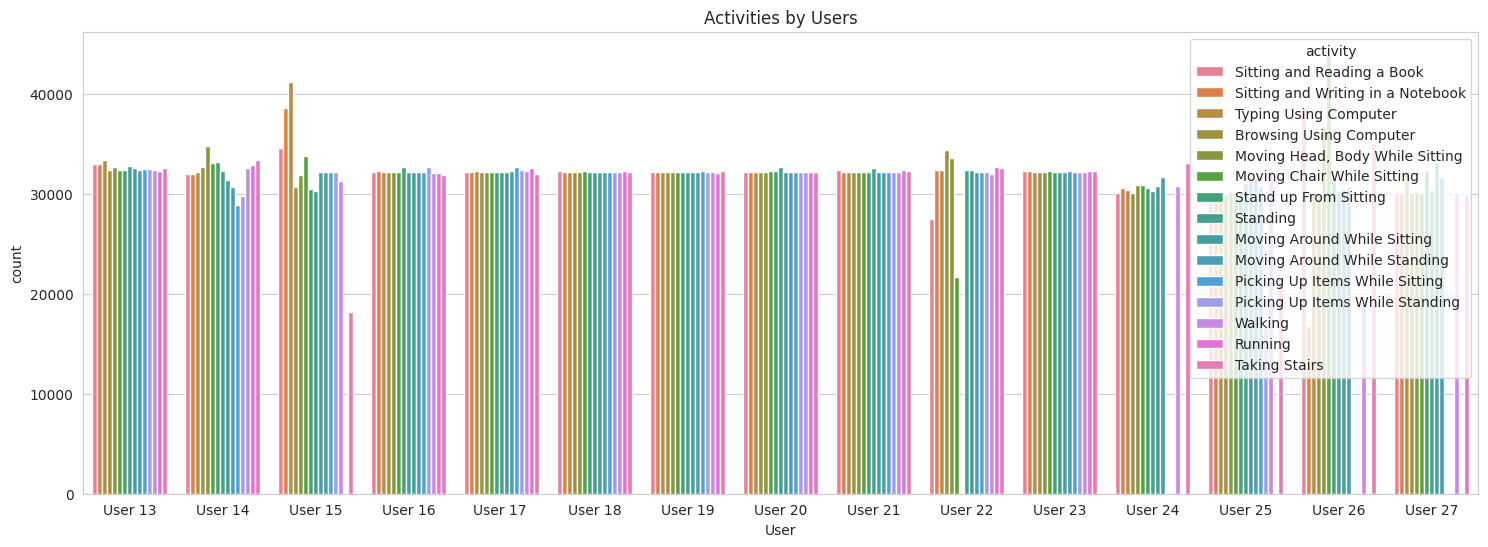

In [15]:
# Count plot by User / Activity
sorted_users = sorted(all_activities_df['User'].unique())
plt.figure(figsize=(18, 6))
sns.countplot(x='User', hue='activity', data=all_activities_df, order = sorted_users)
plt.title('Activities by Users')
plt.show()

# Graphing Methods

In [16]:
def fig_accelerometerfile(file):
    data_acc = pd.read_csv(file)
    data_acc.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']
    fig, axarr = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

    # Plot the accelerometer data
    axarr.plot(data_acc['timestamp'], data_acc['x'], label='x')
    axarr.plot(data_acc['timestamp'], data_acc['y'], label='y')
    axarr.plot(data_acc['timestamp'], data_acc['z'], label='z')

    # Add legend and show plot
    axarr.legend()
    plt.xlabel('Timestamp')
    plt.ylabel('Acceleration')
    plt.title('Accelerometer Data')
    plt.show()

def fig_accelerometer(data):
    # Working with a dataframe instead of a file
    temp_df = data.copy()

    # Rename columns for easier access
    temp_df.rename(columns={'x-axis (g)': 'x', 'y-axis (g)': 'y', 'z-axis (g)': 'z'}, inplace=True)

    # Convert 'elapsed' column to datetime and then to milliseconds
    temp_df['timestamp'] = pd.to_datetime(temp_df['elapsed (s)']).astype('int64') * 1000 # Convert to milliseconds

    # Select only relevant columns
    temp_df = temp_df[['timestamp', 'x', 'y', 'z']]

    fig, axarr = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

    # Plot the accelerometer data
    axarr.plot(temp_df['timestamp'], temp_df['x'], label='x')
    axarr.plot(temp_df['timestamp'], temp_df['y'], label='y')
    axarr.plot(temp_df['timestamp'], temp_df['z'], label='z')

    # Add legend and show plot
    axarr.legend()
    plt.xlabel('Elapsed Time (ms)')
    plt.ylabel('Acceleration (g)')
    plt.title('Accelerometer Data')
    plt.show()

def fig_gyroscope(data):
    # Working with a dataframe instead of a file
    temp_df = data.copy()

    # Rename columns for easier access
    temp_df.rename(columns={'x-axis (deg/s)': 'x', 'y-axis (deg/s)': 'y', 'z-axis (deg/s)': 'z'}, inplace=True)

    # Convert 'elapsed' column to datetime and then to milliseconds
    temp_df['timestamp'] = pd.to_datetime(temp_df['elapsed (s)']).astype('int64') * 1000 # Convert to milliseconds

    # Select only relevant columns
    temp_df = temp_df[['timestamp', 'x', 'y', 'z']]

    fig, axarr = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

    # Plot the accelerometer data
    axarr.plot(temp_df['timestamp'], temp_df['x'], label='x')
    axarr.plot(temp_df['timestamp'], temp_df['y'], label='y')
    axarr.plot(temp_df['timestamp'], temp_df['z'], label='z')

    # Add legend and show plot
    axarr.legend()
    plt.xlabel('Elapsed Time (ms)')
    plt.ylabel('Angle (deg)')
    plt.title('Gyroscope Data')
    plt.show()

def fig_magnetometer(data):
    # Working with a dataframe instead of a file
    temp_df = data.copy()

    # Rename columns for easier access
    temp_df.rename(columns={'x-axis (T)': 'x', 'y-axis (T)': 'y', 'z-axis (T)': 'z'}, inplace=True)

    # Convert 'elapsed' column to datetime and then to milliseconds
    temp_df['timestamp'] = pd.to_datetime(temp_df['elapsed (s)']).astype('int64') * 1000 # Convert to milliseconds

    # Select only relevant columns
    temp_df = temp_df[['timestamp', 'x', 'y', 'z']]

    fig, axarr = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

    # Plot the accelerometer data
    axarr.plot(temp_df['timestamp'], temp_df['x'], label='x')
    axarr.plot(temp_df['timestamp'], temp_df['y'], label='y')
    axarr.plot(temp_df['timestamp'], temp_df['z'], label='z')

    # Add legend and show plot
    axarr.legend()
    plt.xlabel('Elapsed Time (ms)')
    plt.ylabel('Magnetic Field Strength (T)')
    plt.title('Magnetometer Data')
    plt.show()

def fig_pressure(data):
    # Working with a dataframe instead of a file
    temp_df = data.copy()

    # Rename columns for easier access
    temp_df.rename(columns={'pressure (Pa)' : 'Pa'}, inplace=True)

    # Convert 'elapsed' column to datetime and then to milliseconds
    temp_df['timestamp'] = pd.to_datetime(temp_df['elapsed (s)']).astype('int64') * 1000 # Convert to milliseconds

    # Select only relevant columns
    temp_df = temp_df[['timestamp', 'Pa']]

    fig, axarr = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

    # Plot the accelerometer data
    axarr.plot(temp_df['timestamp'], temp_df['Pa'], label='Pa')

    # Add legend and show plot
    axarr.legend()
    plt.xlabel('Elapsed Time (ms)')
    plt.ylabel('Pressure (Pa)')
    plt.title('Pressure Data')
    plt.show()

# Shorthand way for me to call the previous methods
def plot_experiment_data(exp_num):

    sensor_types = {
        "Accelerometer": fig_accelerometer,
        "Gyroscope": fig_gyroscope,
        "Magnetometer": fig_magnetometer,
        "Pressure": fig_pressure
    }

    # Iterate through the sensor types and try to retrieve each DataFrame
    for sensor, plot_func in sensor_types.items():
        # Create the key for the dictionary
        combined_key = f"{exp_num}_{sensor}"

        # Retrieve the DataFrame from exp_sensor_dataframes
        df = exp_sensor_dataframes.get(combined_key)

        # Check if the DataFrame exists and is not None
        if df is not None:
            plot_func(df)
        else:
            print(f"No data found for {sensor} in experiment {exp_num}.")

# Listing Dictionary Entries

In [17]:
activity_names_sorted = sorted(list(exp_sensor_dataframes.keys()), key=lambda x: (int(x.split('_')[0]), x.split('_')[1]))
print("Experiment Entries with Sensor:", activity_names_sorted)
print("Activity Entries with Sensor:", list(activity_dataframes.keys()))

Experiment Entries with Sensor: ['133_Accelerometer', '133_Gyroscope', '133_Magnetometer', '133_Pressure', '134_Accelerometer', '134_Gyroscope', '134_Magnetometer', '134_Pressure', '135_Accelerometer', '135_Gyroscope', '135_Magnetometer', '135_Pressure', '136_Accelerometer', '136_Gyroscope', '136_Magnetometer', '136_Pressure', '137_Accelerometer', '137_Gyroscope', '137_Magnetometer', '137_Pressure', '138_Accelerometer', '138_Gyroscope', '138_Magnetometer', '138_Pressure', '139_Accelerometer', '139_Gyroscope', '139_Magnetometer', '139_Pressure', '140_Accelerometer', '140_Gyroscope', '140_Magnetometer', '140_Pressure', '141_Accelerometer', '141_Gyroscope', '141_Magnetometer', '141_Pressure', '142_Accelerometer', '142_Gyroscope', '142_Magnetometer', '142_Pressure', '143_Accelerometer', '143_Gyroscope', '143_Magnetometer', '143_Pressure', '144_Accelerometer', '144_Gyroscope', '144_Magnetometer', '144_Pressure', '145_Accelerometer', '145_Gyroscope', '145_Magnetometer', '145_Pressure', '146_

# Data for User 13 (Sitting and Reading a Book / Activity 1) Exp. No 133

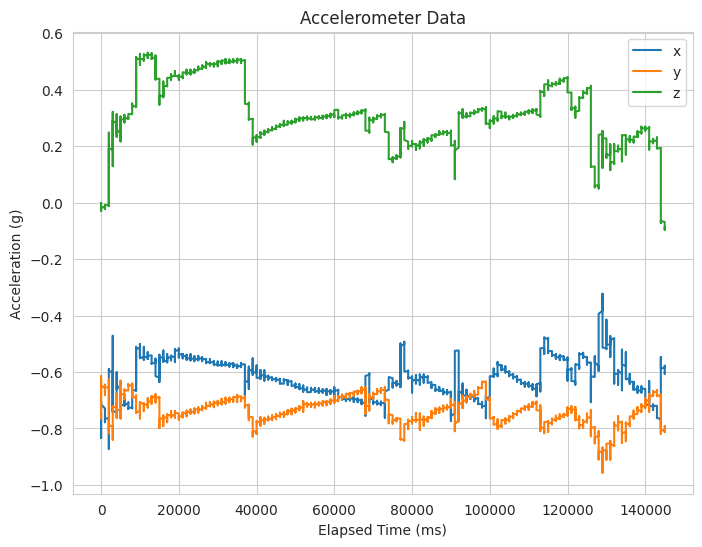

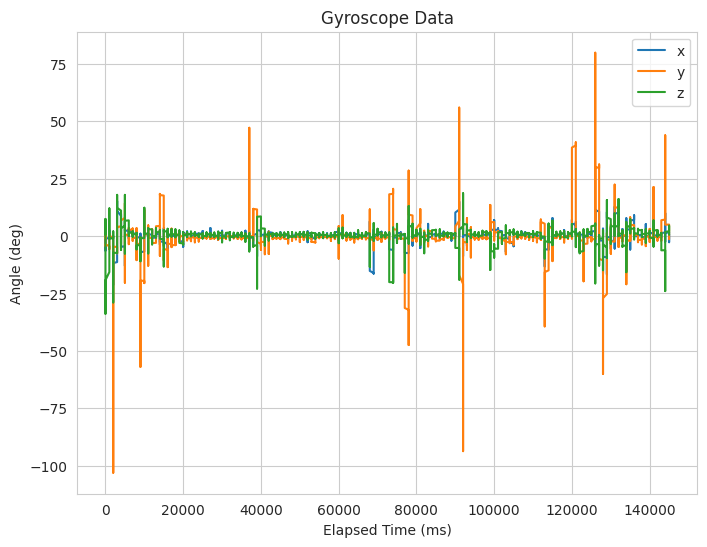

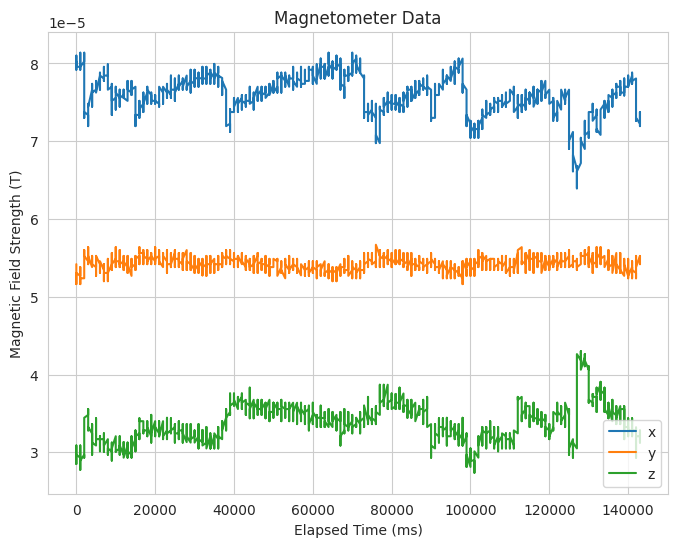

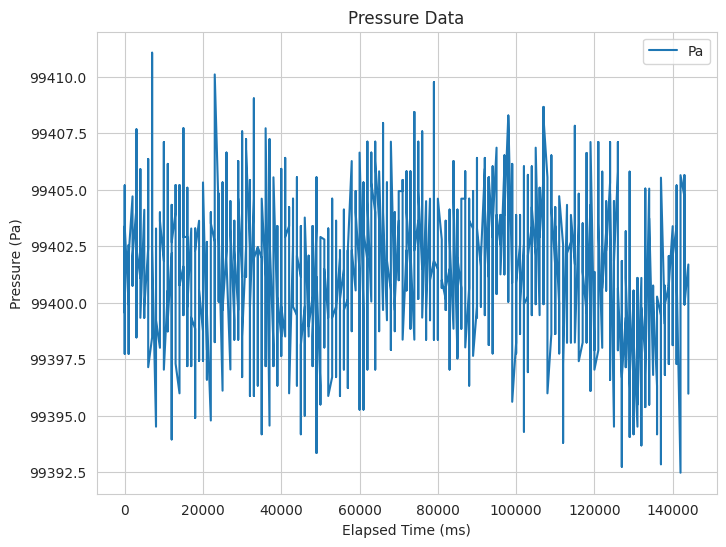

In [18]:
plot_experiment_data(133)

# Data for User 19 (Moving Head, Body while Sitting / Activity 5) Exp. No 227

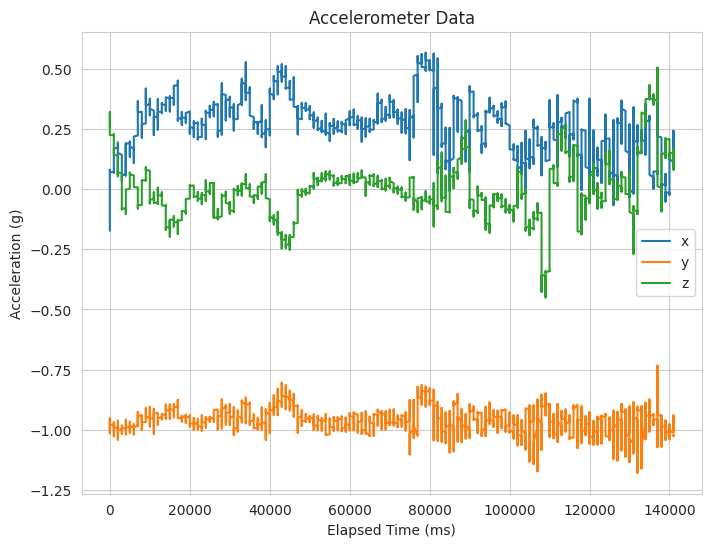

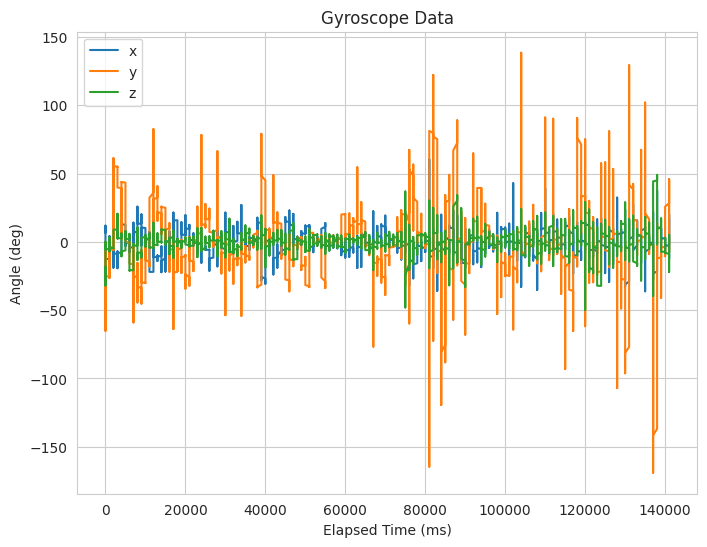

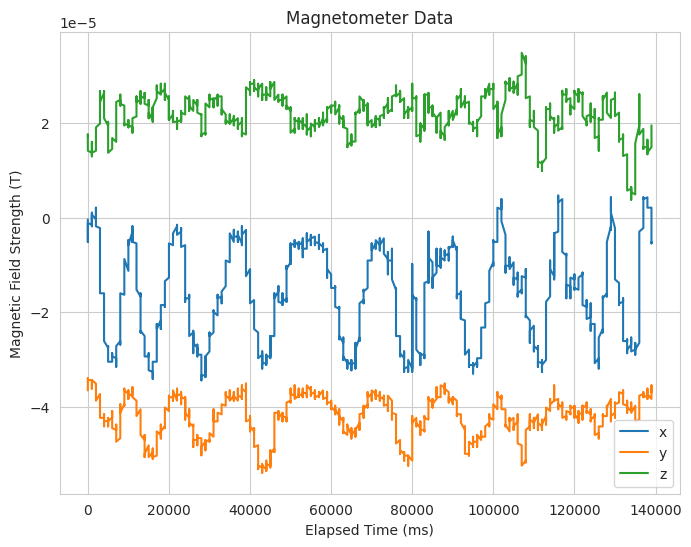

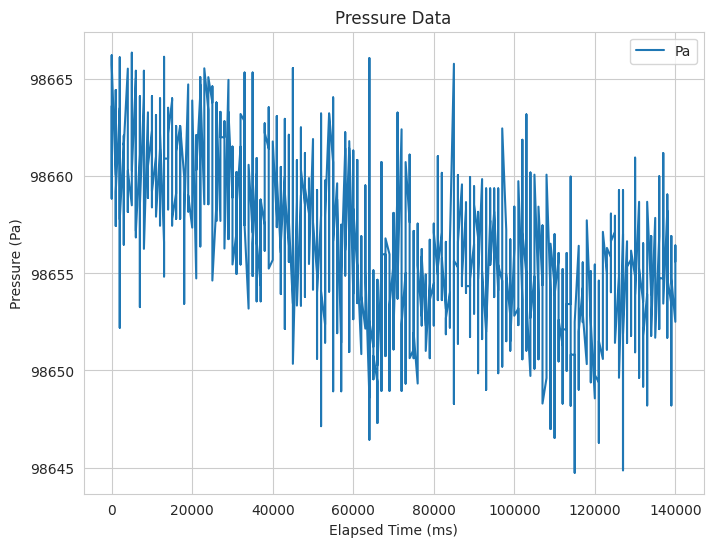

In [19]:
plot_experiment_data(227)

# Data for User 25 (Standing Up From Sitting / Activity 7) Exp No. 318

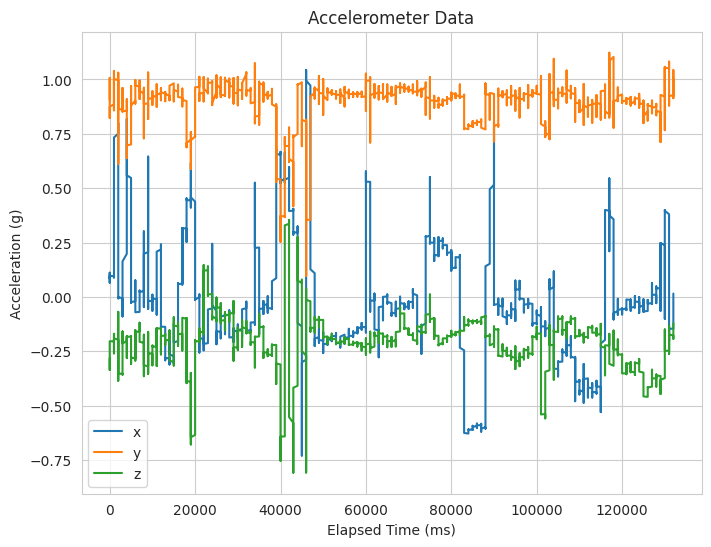

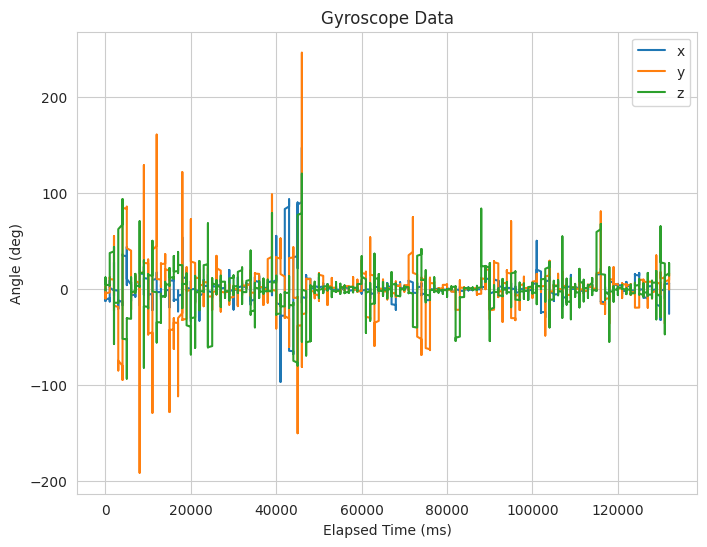

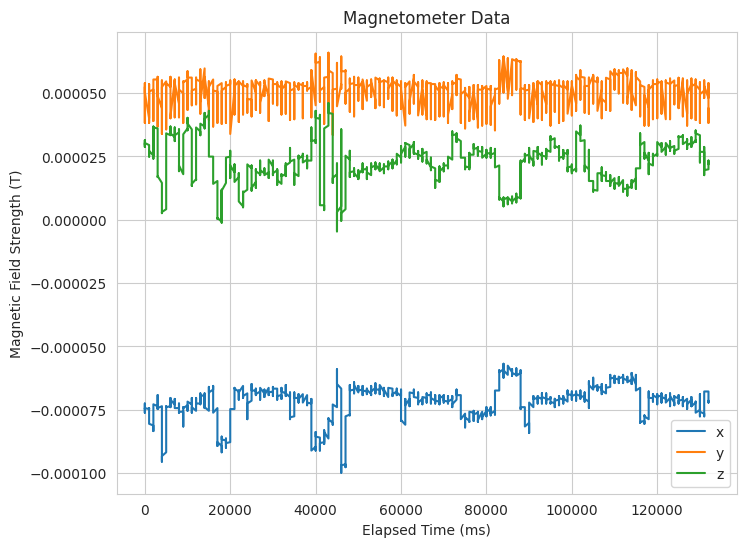

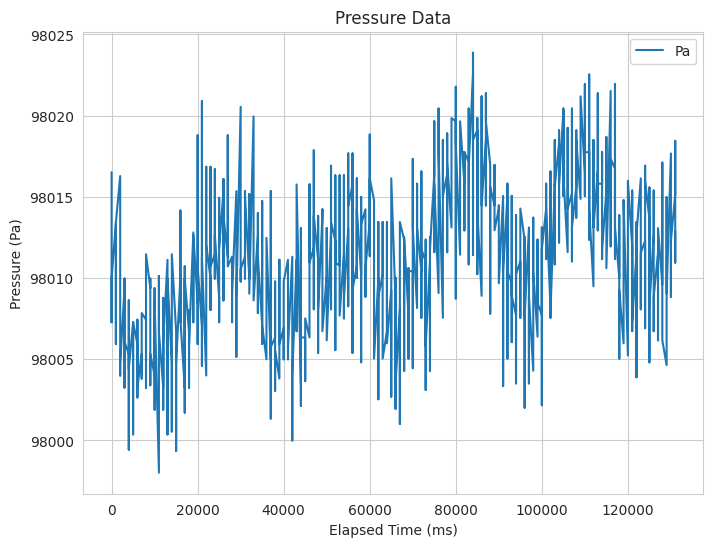

In [20]:
plot_experiment_data(318)

# Data for User 27 (Taking Stairs / Activity 11) Exp No. 349

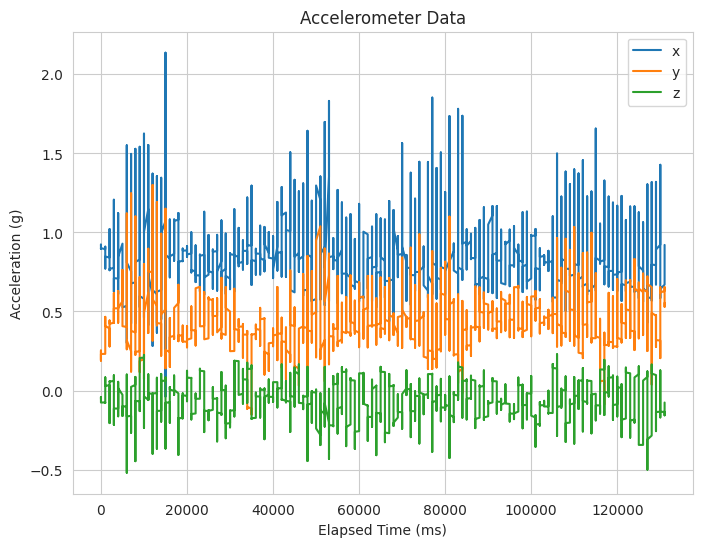

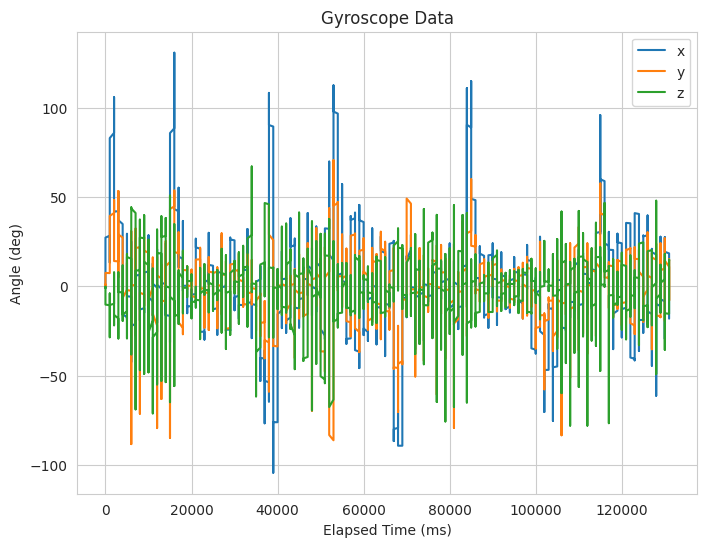

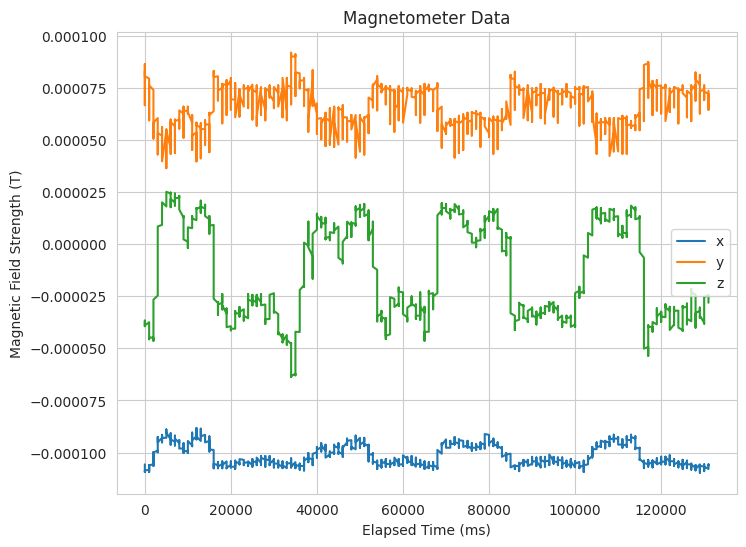

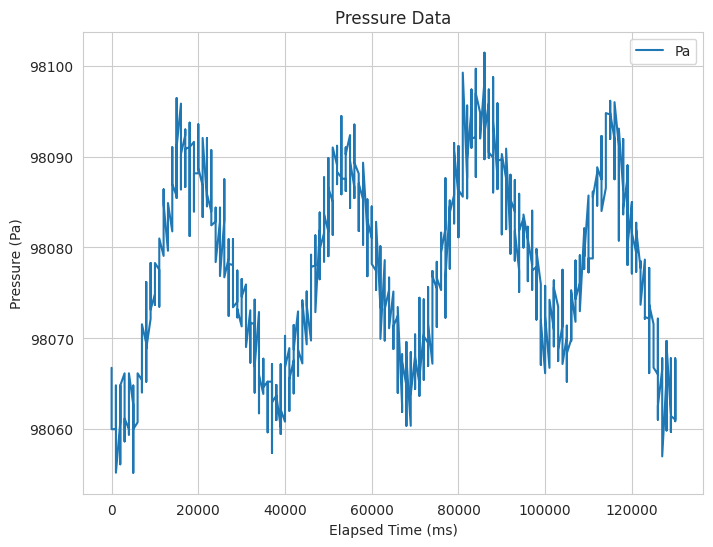

In [21]:
plot_experiment_data(349)

# Accelerometer Data for all instances of Sitting and Reading a Book

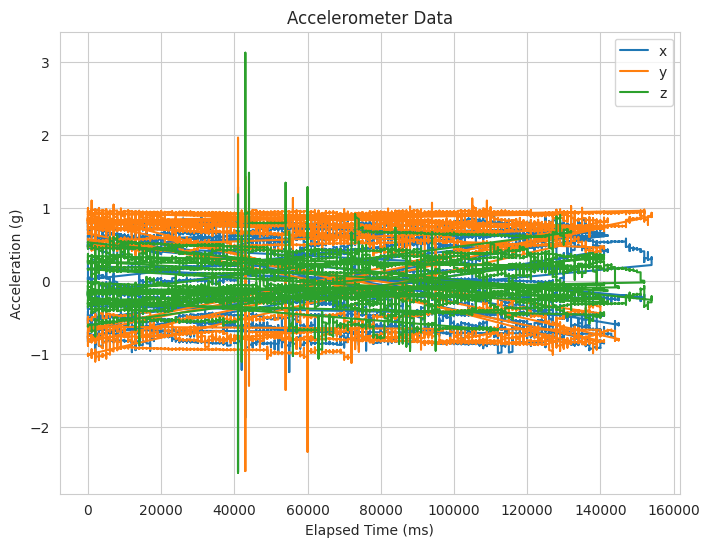

In [22]:
reading_acc_df = activity_dataframes.get("Sitting and Reading a Book_Accelerometer")
fig_accelerometer(reading_acc_df)

# Accelerometer Data of a Single User22 File

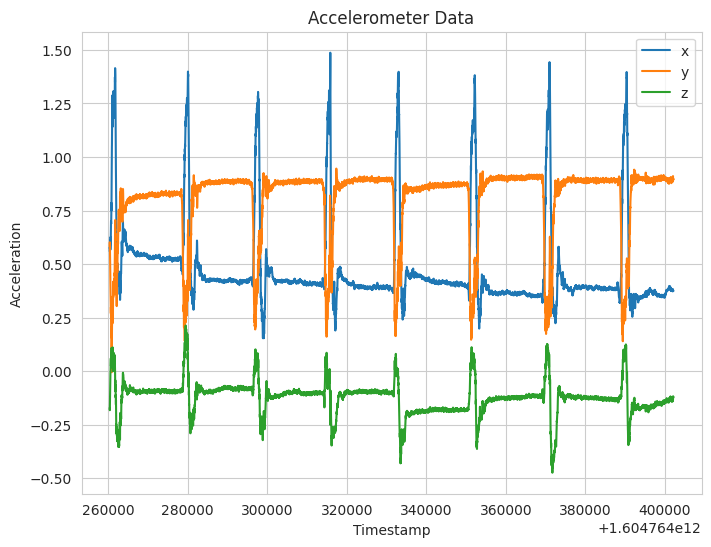

In [23]:
fig_accelerometerfile("/content/drive/MyDrive/DataSet2/User22/282_Werable1_2020-11-07T10.51.00.156_F1E55E2FE95F_Accelerometer_100.000Hz_1.5.0.csv")

# Combining All Accelerometer and Gyroscope Data for Feature Extraction

In [69]:
acc_dataframes = []
gyro_dataframes = []

# Iterate over the items in the activity_dataframes dictionary
for key, df in activity_dataframes.items():
    # Check if the DataFrame corresponds to accelerometer data
    if 'Accelerometer' in key:
        # Rename columns
        df.rename(columns={'x-axis (g)': 'x', 'y-axis (g)': 'y', 'z-axis (g)': 'z'}, inplace=True)
        # Append to the list for accelerometer data
        acc_dataframes.append(df)
    # Check if the DataFrame corresponds to gyroscope data
    elif 'Gyroscope' in key:
        # Rename columns
        df.rename(columns={'x-axis (deg/s)': 'x', 'y-axis (deg/s)': 'y', 'z-axis (deg/s)': 'z'}, inplace=True)
        # Append to the list for gyroscope data
        gyro_dataframes.append(df)

# Concatenate all accelerometer/gyroscope DataFrames into a single DataFrame
accelerometer_df = pd.concat(acc_dataframes, ignore_index=True)
gyroscope_df = pd.concat(gyro_dataframes, ignore_index=True)

# Caused errors
#accelerometer_df = accelerometer_df[['x', 'y', 'z']]
#gyroscope_df = gyroscope_df[['x', 'y', 'z']]

print(gyroscope_df.head())

      epoch (ms)            time (-13:00)  elapsed (s)      x      y      z  \
0  1604169939384  2020-10-31T14:45:39.384         0.00  5.915 -4.207  6.524   
1  1604169939394  2020-10-31T14:45:39.394         0.01  5.366 -4.939  6.098   
2  1604169939404  2020-10-31T14:45:39.404         0.02  5.427 -4.573  6.890   
3  1604169939414  2020-10-31T14:45:39.414         0.03  5.244 -4.695  6.829   
4  1604169939424  2020-10-31T14:45:39.424         0.04  5.000 -4.756  6.341   

      User                    Activity  
0  User 21  Sitting and Reading a Book  
1  User 21  Sitting and Reading a Book  
2  User 21  Sitting and Reading a Book  
3  User 21  Sitting and Reading a Book  
4  User 21  Sitting and Reading a Book  


In [101]:
# Result list to store extracted features
result_list = []

# Set the window size for feature extraction
window_size = 400

# Overlap percentage
overlap = 0.50

# Calculate the step size based on the overlap
step_size = int(window_size * (1 - overlap))

# Determine the total number of windows based on step size
num_windows = (min(len(accelerometer_df), len(gyroscope_df)) - window_size) // step_size + 1

# Proceed with windowing for both accelerometer and gyroscope
for window_index in range(num_windows):
    start_index = window_index * step_size
    end_index = start_index + window_size

    # Check to avoid index errors for the last partial window
    if end_index > len(accelerometer_df) or end_index > len(gyroscope_df):
        break

    # Slice the DataFrames for the current window
    window_acc_data = accelerometer_df.loc[start_index:end_index - 1]
    window_gyro_data = gyroscope_df.loc[start_index:end_index - 1]

    # Ensure the activity type is consistent within the window
    if window_acc_data["Activity"].nunique() != 1 or window_gyro_data["Activity"].nunique() != 1:
        continue  # Skip this window if it contains multiple activity types

    # Ensure columns are numeric
    for col in ['x', 'y', 'z']:
        window_acc_data.loc[:, col] = pd.to_numeric(window_acc_data[col], errors='coerce')
        window_gyro_data.loc[:, col] = pd.to_numeric(window_gyro_data[col], errors='coerce')

    # Features for Accelerometer
    acc_x_mean = window_acc_data['x'].mean()
    acc_y_mean = window_acc_data['y'].mean()
    acc_z_mean = window_acc_data['z'].mean()

    acc_x_var = window_acc_data['x'].var()
    acc_y_var = window_acc_data['y'].var()
    acc_z_var = window_acc_data['z'].var()

    acc_sumxyz = window_acc_data[['x', 'y', 'z']].sum().sum()
    acc_maxxyz = window_acc_data[['x', 'y', 'z']].max().max()
    acc_minxyz = window_acc_data[['x', 'y', 'z']].min().min()
    acc_abssum = window_acc_data[['x', 'y', 'z']].abs().sum().sum()
    acc_abssum_mean = acc_abssum / window_size

    # Features for Gyroscope
    gyro_x_mean = window_gyro_data['x'].mean()
    gyro_y_mean = window_gyro_data['y'].mean()
    gyro_z_mean = window_gyro_data['z'].mean()

    gyro_x_var = window_gyro_data['x'].var()
    gyro_y_var = window_gyro_data['y'].var()
    gyro_z_var = window_gyro_data['z'].var()

    gyro_sumxyz = window_gyro_data[['x', 'y', 'z']].sum().sum()
    gyro_maxxyz = window_gyro_data[['x', 'y', 'z']].max().max()
    gyro_minxyz = window_gyro_data[['x', 'y', 'z']].min().min()
    gyro_abssum = window_gyro_data[['x', 'y', 'z']].abs().sum().sum()
    gyro_abssum_mean = gyro_abssum / window_size

    # Append the features to the result list
    # Extract the activity type for the current window
    activity_type = window_acc_data['Activity'].iloc[0]

    # Append the features
    result_list.append([
        acc_x_mean, acc_y_mean, acc_z_mean, acc_x_var, acc_y_var, acc_z_var,
        acc_sumxyz, acc_maxxyz, acc_minxyz, acc_abssum, acc_abssum_mean,
        gyro_x_mean, gyro_y_mean, gyro_z_mean, gyro_x_var, gyro_y_var, gyro_z_var,
        gyro_sumxyz, gyro_maxxyz, gyro_minxyz, gyro_abssum, gyro_abssum_mean,
        activity_type  # Included activity type
    ])

In [1]:
# Convert the result list to a DataFrame for further analysis
result_df = pd.DataFrame(result_list, columns=[
    'acc_x_mean', 'acc_y_mean', 'acc_z_mean', 'acc_x_var', 'acc_y_var', 'acc_z_var',
    'acc_sumxyz', 'acc_maxxyz', 'acc_minxyz', 'acc_abssum', 'acc_abssum_mean',
    'gyro_x_mean', 'gyro_y_mean', 'gyro_z_mean', 'gyro_x_var', 'gyro_y_var', 'gyro_z_var',
    'gyro_sumxyz', 'gyro_maxxyz', 'gyro_minxyz', 'gyro_abssum', 'gyro_abssum_mean',
    'activity'
])

# Display the first few rows of the resulting DataFrame
result_df.head()

NameError: name 'pd' is not defined

# Generating the Feature Extraction File

In [ ]:
# Save the CSV
output_path = os.path.join(dataset_dir, "W400_O50_Features.csv")
result_df.to_csv(output_path, index=False)

#This can replace our raw files, allowing us to run machine learning algorithms upon it